In [1]:
# --- Essential Imports ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # For the statevector simulator
from qiskit.visualization import plot_bloch_multivector # For Bloch sphere visualization
import matplotlib.pyplot as plt # For displaying plots
import numpy as np # For pi constant in rotation gates

In [2]:
print("Qiskit libraries imported successfully!")
import qiskit
import qiskit_aer
print(f"Qiskit version: {qiskit.__version__}")
print(f"Qiskit Aer version: {qiskit_aer.__version__}")

Qiskit libraries imported successfully!
Qiskit version: 2.1.0
Qiskit Aer version: 0.17.1


In [3]:
# --- Jupyter Magic Command ---
%matplotlib inline

In [4]:
# --- Get the Statevector Simulator ---
# This simulator gives us the quantum state (statevector) of the circuit,
# which is what plot_bloch_multivector needs.
statevector_simulator = Aer.get_backend('statevector_simulator')

In [5]:
# --- Helper Function to Get Statevector and Plot ---
def get_and_plot_state(circuit, title="Qubit State on Bloch Sphere"):
    """Simulates the circuit to get the statevector and plots it on the Bloch sphere."""
    # Transpile the circuit for the simulator
    transpiled_qc = transpile(circuit, statevector_simulator)
    # Run the simulation (no shots needed for statevector)
    job = statevector_simulator.run(transpiled_qc)
    # Get the result
    result = job.result()
    # Get the statevector
    statevector = result.get_statevector(circuit)

    print(f"\n--- {title} ---")
    print(f"Statevector: {statevector}") # Show the complex vector components

    # Plot the Bloch sphere
    plot = plot_bloch_multivector(statevector)
    plt.title(title) # Set plot title
    plt.show(plot) # Display the plot


--- 1. Initial State: |0⟩ (North Pole) ---
Statevector: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


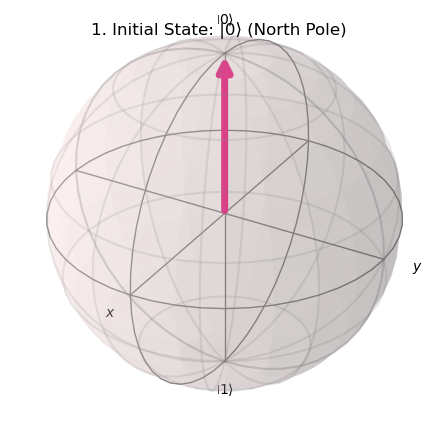

In [6]:
# --- 1. Initial State: |0⟩ ---
# A new circuit with 1 qubit. Qubits are initialized to |0⟩ by default.
qc_initial = QuantumCircuit(1)
get_and_plot_state(qc_initial, "1. Initial State: |0⟩ (North Pole)")


--- 2. After Hadamard (H) Gate: +X Axis ---
Statevector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


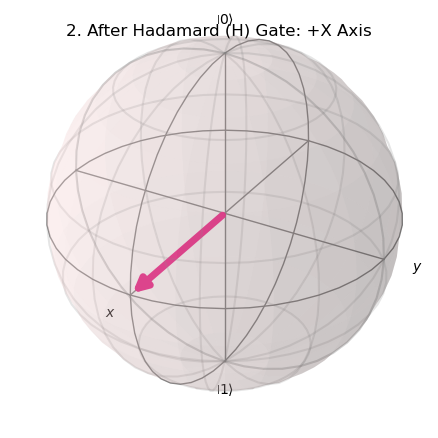

In [7]:
# --- 2. Applying Hadamard (H) Gate ---
# The Hadamard gate creates a superposition state.
# From |0⟩, it goes to (|0⟩ + |1⟩)/sqrt(2), which is on the +X axis.
qc_h = QuantumCircuit(1)
qc_h.h(0) # Apply Hadamard to qubit 0
get_and_plot_state(qc_h, "2. After Hadamard (H) Gate: +X Axis")



--- 3. After Pauli-X (X) Gate: |1⟩ (South Pole) ---
Statevector: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


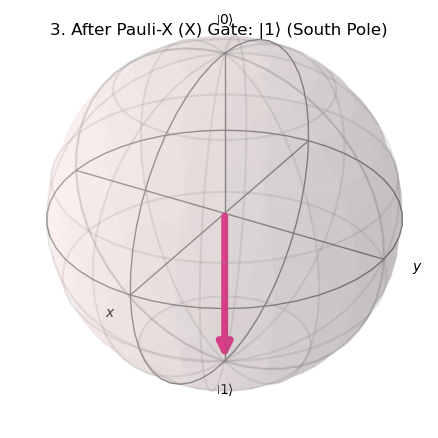

In [8]:
# --- 3. Applying Pauli-X (X) Gate ---
# The Pauli-X gate acts as a NOT gate, flipping |0⟩ to |1⟩ and vice versa.
# It rotates the state by pi radians around the X-axis.
qc_x = QuantumCircuit(1)
qc_x.x(0) # Apply Pauli-X to qubit 0
get_and_plot_state(qc_x, "3. After Pauli-X (X) Gate: |1⟩ (South Pole)")


--- 4. After Pauli-Y (Y) Gate: -Y Axis (imaginary component) ---
Statevector: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


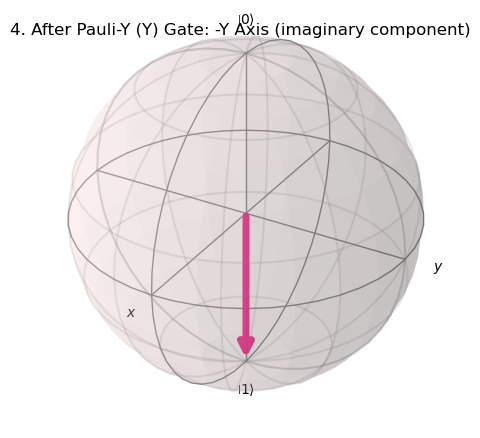

In [9]:
# --- 4. Applying Pauli-Y (Y) Gate ---
# The Pauli-Y gate rotates the state by pi radians around the Y-axis.
# From |0⟩, it goes to i|1⟩.
qc_y = QuantumCircuit(1)
qc_y.y(0) # Apply Pauli-Y to qubit 0
get_and_plot_state(qc_y, "4. After Pauli-Y (Y) Gate: -Y Axis (imaginary component)")


--- 5. After Pauli-Z (Z) Gate: Still |0⟩ (Phase Flip on |1⟩) ---
Statevector: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))


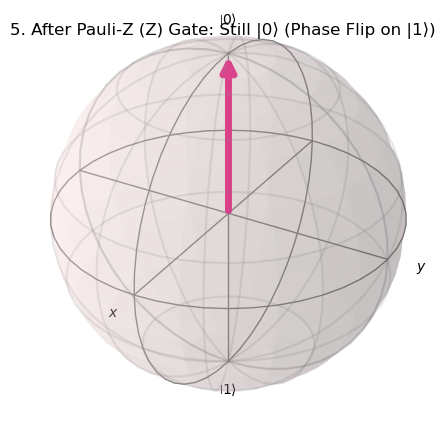

In [10]:
# --- 5. Applying Pauli-Z (Z) Gate ---
# The Pauli-Z gate rotates the state by pi radians around the Z-axis.
# It flips the phase of |1⟩. From |0⟩, it leaves it as |0⟩.
qc_z = QuantumCircuit(1)
qc_z.z(0) # Apply Pauli-Z to qubit 0
get_and_plot_state(qc_z, "5. After Pauli-Z (Z) Gate: Still |0⟩ (Phase Flip on |1⟩)")


--- 6. After Rx(pi/2) Gate: +Y Axis ---
Statevector: Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


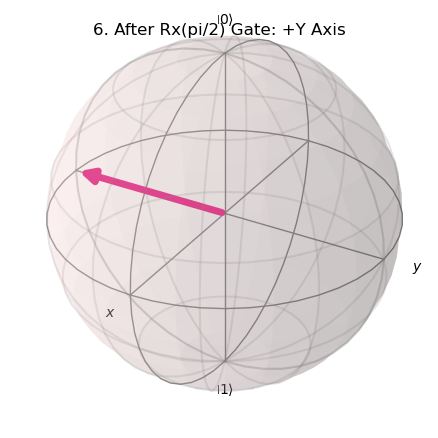

In [11]:
# --- 6. Applying Rotation X (Rx) Gate ---
# Rx rotates the state around the X-axis by a given angle (theta).
# Let's rotate |0⟩ by pi/2 around X, which moves it to the +Y axis.
qc_rx = QuantumCircuit(1)
qc_rx.rx(np.pi/2, 0) # Rotate by pi/2 (90 degrees) around X-axis
get_and_plot_state(qc_rx, "6. After Rx(pi/2) Gate: +Y Axis")


--- 7. After Ry(pi/2) Gate: +X Axis ---
Statevector: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


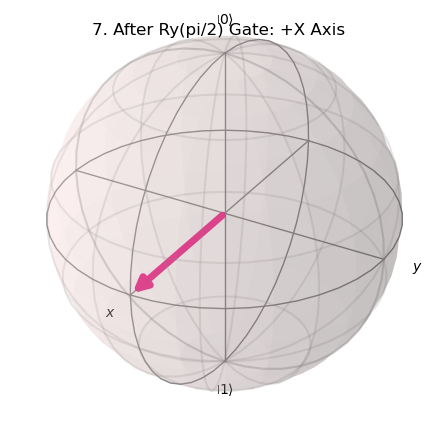

In [12]:
# --- 7. Applying Rotation Y (Ry) Gate ---
# Ry rotates the state around the Y-axis by a given angle (theta).
# Let's rotate |0⟩ by pi/2 around Y, which moves it to the +X axis.
qc_ry = QuantumCircuit(1)
qc_ry.ry(np.pi/2, 0) # Rotate by pi/2 (90 degrees) around Y-axis
get_and_plot_state(qc_ry, "7. After Ry(pi/2) Gate: +X Axis")


--- 8. After H then Rz(pi/2) Gate: +Y Axis ---
Statevector: Statevector([0.5-0.5j, 0.5+0.5j],
            dims=(2,))


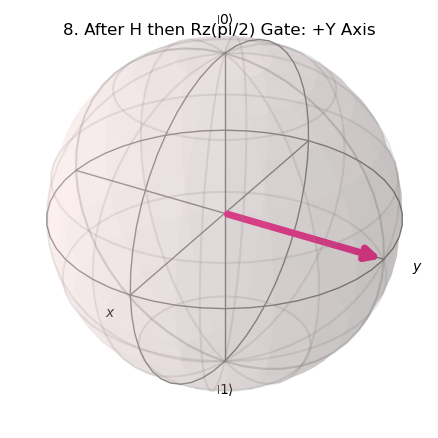

In [13]:
# --- 8. Applying Rotation Z (Rz) Gate ---
# Rz rotates the state around the Z-axis by a given angle (phi).
# This gate only affects the phase, so it won't change the position on the Bloch sphere
# if the qubit is already on the Z-axis (|0> or |1>).
# Let's apply it after a Hadamard to see its effect on a superposition.
qc_rz = QuantumCircuit(1)
qc_rz.h(0) # First put it in +X state
qc_rz.rz(np.pi/2, 0) # Then rotate by pi/2 around Z-axis (moves +X to +Y)
get_and_plot_state(qc_rz, "8. After H then Rz(pi/2) Gate: +Y Axis")


--- 9. After X then H Gate: -X Axis (the |-> state) ---
Statevector: Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))


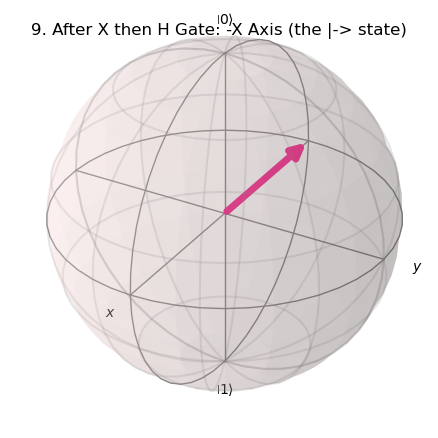

In [14]:
# --- 9. Combining Gates: Creating a |-> State ---
# Apply Hadamard to |0> to get +X, then apply X to get -X.
# Or, apply H to |1> to get -X. Let's start from |0> and get to -X.
qc_minus_x = QuantumCircuit(1)
qc_minus_x.x(0) # Start with |1> (South Pole)
qc_minus_x.h(0) # Apply H to |1> to get (|0>-|1>)/sqrt(2), which is -X
get_and_plot_state(qc_minus_x, "9. After X then H Gate: -X Axis (the |-> state)")